In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
df=pd.read_csv("communities_and_crime.csv")

In [176]:
drop_cols = ["state", "county", "community", "communityname", "fold"]
df = df.drop(columns=drop_cols, errors="ignore")

df = df.replace("?", np.nan)

target = "ViolentCrimesPerPop"
X = df.drop(columns=[target])
y = df[target]

X = X.apply(pd.to_numeric, errors="coerce")

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

print("Original features:", X.shape[1])
print("Reduced PCA features:", X_pca.shape[1])
print("Explained variance (per component):", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Original features: 122
Reduced PCA features: 30
Explained variance (per component): [0.21285015 0.14680606 0.09421879 0.06716682 0.05675088 0.03688164
 0.03283911 0.03000144 0.0249368  0.01805331 0.01716147 0.01391506
 0.01330488 0.01280931 0.01194009 0.01124792 0.0107534  0.00873628
 0.00870672 0.00823318 0.00788673 0.00735089 0.00726308 0.00714923
 0.00656053 0.00613858 0.00588213 0.0053849  0.00519771 0.00493825]
Total variance explained: 0.9010653320776486


In [177]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results")
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("MAE:", mae)
print("R² Score:", r2)


Linear Regression Results
MSE: 0.01758191993249309
RMSE: 0.13259683228679744
MAE: 0.09209353122711425
R² Score: 0.6329127098834761


In [ ]:
r2_scores = []

for n in range(1, 20):
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

best_n = np.argmax(r2_scores) + 1
best_score = max(r2_scores)

print("Best n_estimators:", best_n)
print("Best R² Score:", best_score)

Best n_estimators: 18
Best R² Score: 0.6079782073932762


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

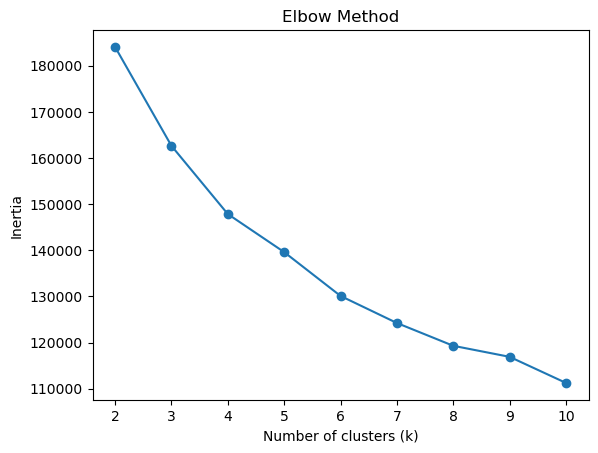

Silhouette score: 0.18780043901577093


c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [186]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print("Silhouette score:", score)




c:\Users\malar\anaconda5\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


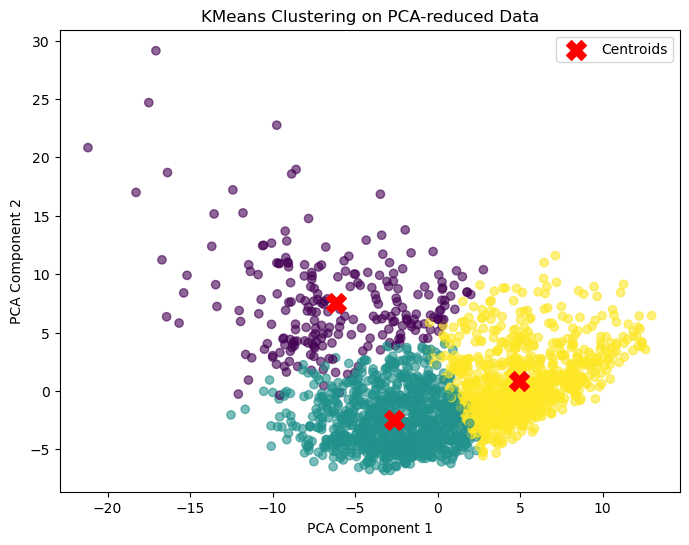

In [180]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap="viridis", alpha=0.6
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c="red", marker="X", s=200, label="Centroids"
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering on PCA-reduced Data")
plt.legend()
plt.show()

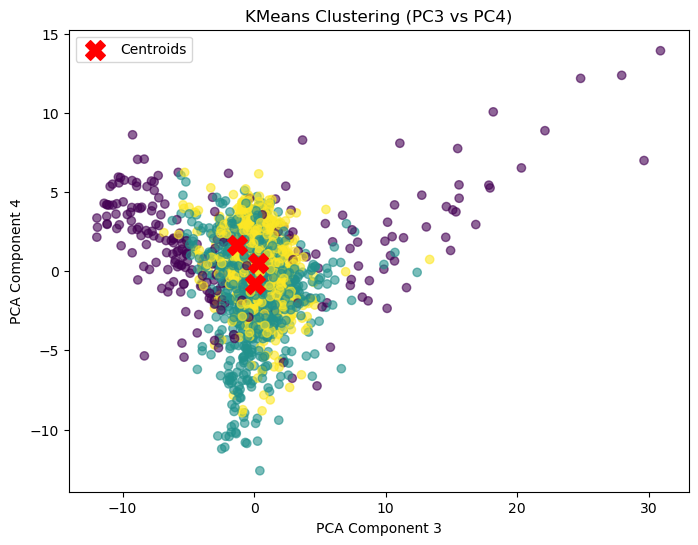

In [181]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 2],  
    X_pca[:, 3],  
    c=clusters, cmap="viridis", alpha=0.6
)
plt.scatter(
    kmeans.cluster_centers_[:, 2],  
    kmeans.cluster_centers_[:, 3],  
    c="red", marker="X", s=200, label="Centroids"
)
plt.xlabel("PCA Component 3")
plt.ylabel("PCA Component 4")
plt.title("KMeans Clustering (PC3 vs PC4)")
plt.legend()
plt.show()


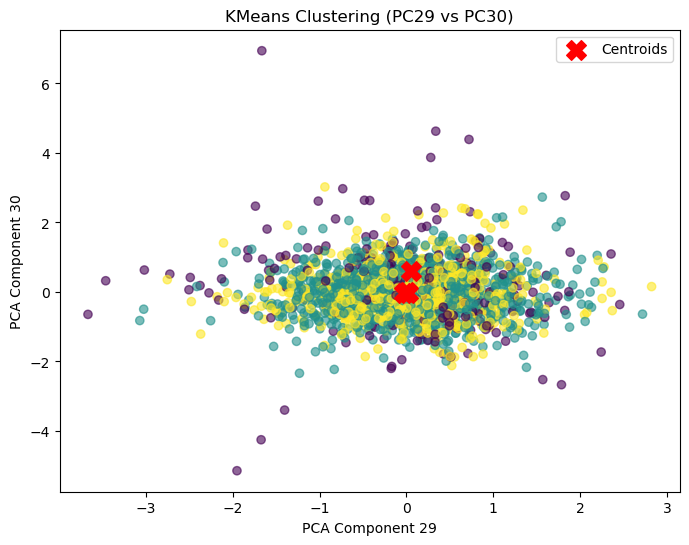

In [187]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 28],  
    X_pca[:, 29], 
    c=clusters, cmap="viridis", alpha=0.6
)
plt.scatter(
    kmeans.cluster_centers_[:, 28],  
    kmeans.cluster_centers_[:, 29],  
    c="red", marker="X", s=200, label="Centroids"
)
plt.xlabel("PCA Component 29")
plt.ylabel("PCA Component 30")
plt.title("KMeans Clustering (PC29 vs PC30)")
plt.legend()
plt.show()


In [ ]:
df_cluster_target = pd.DataFrame({
    "Cluster": clusters,
    "ViolentCrimesPerPop": y.reset_index(drop=True)
})

print(df_cluster_target.groupby("Cluster")["ViolentCrimesPerPop"].mean())

Cluster
0    0.497739
1    0.284694
2    0.106783
Name: ViolentCrimesPerPop, dtype: float64


In [ ]:
import pickle
best_rf = RandomForestRegressor(n_estimators=best_n, random_state=42)
best_rf.fit(X_train, y_train)

with open("rf_model.sav", "wb") as f:
    pickle.dump((best_rf, scaler, imputer, pca), f)